<a href="https://colab.research.google.com/github/Daprosero/Procesamiento_Lenguaje_Natural/blob/main/1.%20Conceptos%20Preliminares/1.3.%20Fundamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://www.funcionpublica.gov.co/documents/d/guest/logo-universidad-nacional)



# **Procesamiento de Lenguaje Natural (NLP)**
### Departamento de Ingeniería Eléctrica, Electrónica y Computación
#### Universidad Nacional de Colombia - Sede Manizales

#### Profesor: Diego A. Pérez

# **Introducción al Procesamiento de Lenguaje Natural**

En este notebook, exploraremos las dificultades y particularidades al trabajar con datos de texto. Como tarea de ejemplo, utilizaremos la colección SMS Spam. Esta contiene aproximadamente 5600 mensajes que han sido clasificados manualmente en dos categorías: "spam" (correo no deseado) y "ham" (no spam o mensajes legítimos).

*Advertencia: Algunos de los mensajes de texto pueden contener palabras ofensivas o contenido sexual.*

## Carga de datos

Comencemos cargando los datos y echémosle un primer vistazo.


In [ ]:
url = "https://raw.githubusercontent.com/juacardonahe/Curso_NLP/refs/heads/main/data/SMSSpamCollection/SMSSpamCollection"

In [ ]:
import pandas as pd
import urllib.request
data = urllib.request.urlopen(url)

lines_split = [
    line.decode().strip().split("\t")
    for line in data
]
df = pd.DataFrame(lines_split, columns=["label", "text"])

In [ ]:
lines_split

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['ham', 'Ok lar... Joking wif u oni...'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['ham', 'U dun say so early hor... U c already then say...'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though"],
 ['spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"],
 ['ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.'],
 ['ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],
 ['spam',
  'WINNER!! As a valued network customer you have been selected to receivea £

In [ ]:
df.sample(5, random_state=123)

,label,text
3237,ham,Aight text me when you're back at mu and I'll ...
843,ham,Our Prashanthettan's mother passed away last n...
3521,ham,No it will reach by 9 only. She telling she wi...
2123,ham,Do you know when the result.
738,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...


In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df["label"].value_counts()

,count
label,
ham,4827
spam,747


Dado que estamos trabajando con mensajes de texto, nuestros datos están bastante desordenados.

¿Cuál es la proporción de mensajes "ham" (no spam) frente a los mensajes "spam"?


## **Extracción de características del texto**

No podemos alimentar datos de texto directamente a un modelo; necesitamos valores numéricos en su lugar. En nuestro primer modelo, no analizaremos el contenido de las palabras, sino que nos centraremos en otras características que podemos extraer del texto. En particular, calcularemos:

- La longitud de un mensaje de texto.
- El número de signos de puntuación utilizados.
- El número de letras en mayúsculas.
- El número de números.
- El número de ocurrencias de la letra X.


In [ ]:
simple_features = df.copy()

simple_features["length"] = df["text"].apply(len)
simple_features["number_punctuation"] = df["text"].apply(lambda x: sum(1 for letter in x if letter in '".,;:!?()_*'))
simple_features["number_uppercase"] = df["text"].apply(lambda x: sum(1 for letter in x if letter!=letter.lower()))
simple_features["number_numbers"] = df["text"].apply(lambda x: sum(1 for letter in x if letter in "0123456789"))
simple_features["number_x"] = df["text"].apply(lambda x: sum(1 for letter in x if letter in "xX"))

simple_features["is_spam"] = df["label"] == "spam"

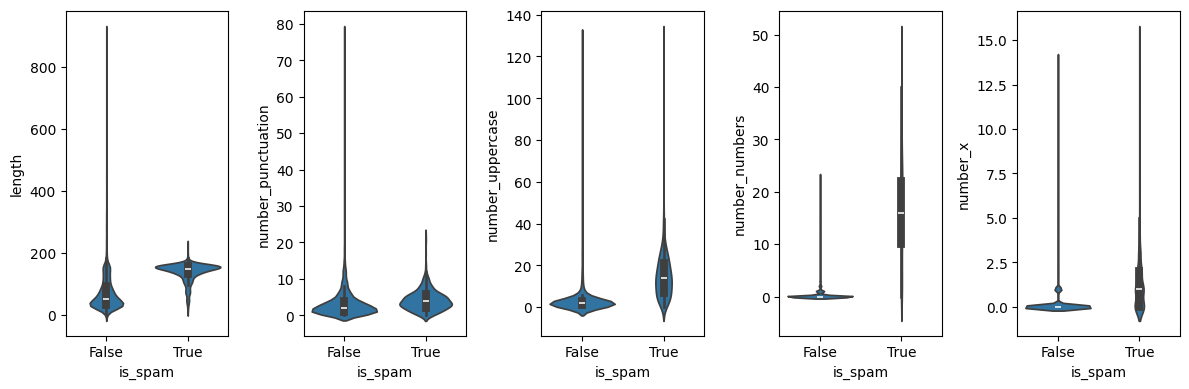

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(12, 4))
sns.violinplot(simple_features, x="is_spam", y="length", ax=axs[0])
sns.violinplot(simple_features, x="is_spam", y="number_punctuation", ax=axs[1])
sns.violinplot(simple_features, x="is_spam", y="number_uppercase", ax=axs[2])
sns.violinplot(simple_features, x="is_spam", y="number_numbers", ax=axs[3])
sns.violinplot(simple_features, x="is_spam", y="number_x", ax=axs[4])

fig.tight_layout()

In [ ]:
simple_features

,label,text,length,number_punctuation,number_uppercase,number_numbers,number_x,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,3,0,0,False
1,ham,Ok lar... Joking wif u oni...,29,6,2,0,0,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,10,25,2,True
3,ham,U dun say so early hor... U c already then say...,49,6,2,0,0,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,2,0,0,False
...,...,...,...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160,6,9,21,0,True
5570,ham,Will ü b going to esplanade fr home?,36,1,1,0,0,False
5571,ham,"Pity, * was in mood for that. So...any other s...",57,7,2,0,0,False
5572,ham,The guy did some bitching but I acted like i'd...,125,0,2,0,1,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score

train, test = train_test_split(simple_features, test_size=.2, random_state=123)

features = [
    "length",
    "number_punctuation",
    "number_uppercase",
    "number_numbers",
    "number_x",
]

logistic_regression = LogisticRegression()
logistic_regression.fit(train[features], train["is_spam"])

test_predictions = logistic_regression.predict(test[features])

In [ ]:
print("Precision:", precision_score(test["is_spam"], test_predictions))
print("Recall:", recall_score(test["is_spam"], test_predictions))
print("F1 score:", f1_score(test["is_spam"], test_predictions))
print("Accuracy:", accuracy_score(test["is_spam"], test_predictions))

print("Confusion matrix:\n", confusion_matrix(test["is_spam"], test_predictions))

Precision: 0.9448275862068966
Recall: 0.8616352201257862
F1 score: 0.9013157894736842
Accuracy: 0.9730941704035875
Confusion matrix:
 [[948   8]
 [ 22 137]]


Vemos que ya obtenemos un rendimiento muy bueno sin siquiera observar las palabras en los datos.

# **Conversión del texto a valores numéricos**
A continuación, queremos crear modelos que realmente analicen el contenido de nuestros mensajes. Para ello, necesitamos convertir el contenido de los mensajes en una representación numérica, que luego podremos pasar a un modelo.

Veamos un solo mensaje de texto:


In [ ]:
example_text = df.loc[4233, "text"]
example_text

"I'm at home. Please call"

¿Cómo podríamos hacer eso? Dado que nuestro lenguaje está compuesto por palabras, parece intuitivo dividir nuestros mensajes en palabras. Luego, podemos asignar un número único a cada palabra. Dividir un documento de texto en partes más pequeñas (típicamente palabras o partes de palabras) se llama tokenization.

Para dividir nuestros mensajes en palabras, primero eliminamos toda la puntuación, excepto la coma, y luego dividimos en cada espacio en blanco.

In [ ]:
def remove_punctuation(text):
    for letter in '".,;:!?()_*':
        text = text.replace(letter, " ")  # replace with a space
    return text

def to_word_list(text):
    without_punctuation = remove_punctuation(text)
    return without_punctuation.split()  # splits at any whitespace

word_list = to_word_list(example_text)
word_list

["I'm", 'at', 'home', 'Please', 'call']

Ahora hemos convertido nuestro texto en una representación numérica, donde la distancia entre cada palabra es igual.

## **Codificando todos los mensajes de texto**

Por supuesto, no queremos codificar solo un mensaje, sino todos los mensajes de texto a la vez. Podemos hacer esto de la siguiente manera:

In [ ]:
df["word_lists"] = df["text"].apply(to_word_list)

def flatten_list_of_lists(list_of_lists):
    """Flattens the list of lists [[a], [b, c]] to [a, b, c]."""
    return [
        e
        for sublist in list_of_lists
        for e in sublist
    ]

# create a list of all words
list_of_all_words = flatten_list_of_lists(df["word_lists"].to_list())


In [ ]:
list_of_all_words[0:10]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n']

In [ ]:
df

,label,text,word_lists
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don't, think, he, goes, to, usf, he, ..."
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5570,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]"
5571,ham,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe..."
5572,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


¿Qué observamos?
- Algunas palabras son nombres propios.
- Algunas palabras no son realmente palabras, sino solo onomatopeyas.
- Algunas palabras son variaciones gramaticales de una raíz de palabra.
- Algunas palabras son errores ortográficos.
- Algunas palabras están en mayúsculas.
- Algunas palabras están en otro idioma.

¿Cómo podríamos mejorar esto?

1. Podríamos eliminar palabras que son raras. Esto eliminaría palabras mal escritas, pero también nombres y lugares raros.
2. Podríamos convertir cada palabra a su origen gramatical (por ejemplo: eliminar el plural o conjugar a la raíz de la palabra). Esto se llama "stemming". Reduciríamos drásticamente el tamaño del vocabulario, pero también perderíamos información importante (si es plural o no, etc.).
3. Podríamos convertir cada palabra a minúsculas, ya que las mayúsculas y minúsculas no cambian el significado de la palabra en inglés.

O, alternativamente:

4. Podríamos dividir palabras raras y conjugadas aún más: por ejemplo, dividir "killing" en [kill, #ing], donde # es un carácter especial para denotar que dividimos una palabra. Esto es más complejo de manejar, pero aún puede manejar palabras raras y conjugación. Este último enfoque es lo que normalmente se hace en los modelos de lenguaje grandes modernos. Puedes encontrar una demostración en este enlace: https://codesandbox.io/s/gpt-tokenizer-tjcjoz.


## **Stemming y eliminación de palabras extrañas**

Vamos a implementar los primeros tres puntos mencionados anteriormente. Realizaremos un stemming rudimentario eliminando ciertos sufijos y solo mantendremos las palabras que ocurren más de 10 veces.

In [ ]:
def to_lower_case(word_list):
    return [
        word.lower() for word in word_list
    ]

to_lower_case(df.loc[4233, "word_lists"])


["i'm", 'at', 'home', 'please', 'call']

In [ ]:
def rudimentary_stemming(word_list):
    suffixes_to_remove = [
        "s",  # plural suffix
        "ing",
        "ed",
    ]
    def remove_suffixes(word):
        for suffix in suffixes_to_remove:
            word = word.removesuffix(suffix)
        return word

    return [
        remove_suffixes(word)
        for word in word_list
    ]

to_show_index = 20

print("Original Sentence:  ", df.loc[to_show_index, "text"])
print("Stemmed Version:    ", rudimentary_stemming(df.loc[20, "word_lists"]))


Original Sentence:   Is that seriously how you spell his name?
Stemmed Version:     ['I', 'that', 'seriously', 'how', 'you', 'spell', 'hi', 'name']


Podemos ver que nuestro **stemming** rudimentario tiene muchos fallos. Existen algoritmos más sofisticados en la práctica, como el [Porter Stemming Algorithm](https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus).

Ahora podemos crear una nueva columna con las listas de palabras limpiadas.


In [ ]:
df["cleaned_word_lists"] = df["word_lists"].apply(
    lambda x: rudimentary_stemming(to_lower_case(x))
)

Construimos nuestro diccionario a continuación, ahora con el criterio de que cada palabra debe aparecer al menos 10 veces.

In [ ]:
def get_frequent_word_dictionary(word_list, minimum_count=10):
    """Create a mapping from frequent words to an integer."""
    # create a dictionary with the number of occurrences of every word
    word_count = pd.Series(word_list).value_counts().to_dict()

    # identify the set of words that are frequent enough
    relevant_words = {
        word for word, count in word_count.items() if count >= minimum_count
    }

    # turn that set into a dictionary
    return {
        word: i
        for i, word in enumerate(relevant_words)
    }


# create a list of all clean words
list_of_clean_words = flatten_list_of_lists(df["cleaned_word_lists"].to_list())

# create the dictionary
frequent_dict = get_frequent_word_dictionary(list_of_clean_words)

In [ ]:
frequent_dict

{'': 0,
 'top': 1,
 'com': 2,
 'okie': 3,
 'muz': 4,
 'let': 5,
 '16+': 6,
 'text': 7,
 'much': 8,
 'sae': 9,
 'congratulation': 10,
 'charg': 11,
 'post': 12,
 'other': 13,
 'sleep': 14,
 'available': 15,
 'tho': 16,
 '100': 17,
 'somewhere': 18,
 '12': 19,
 'sir': 20,
 'guarante': 21,
 'hey': 22,
 'computer': 23,
 'smile': 24,
 'look': 25,
 'close': 26,
 'term': 27,
 'download': 28,
 "how'": 29,
 'anyone': 30,
 'lose': 31,
 'gd': 32,
 'mah': 33,
 'babe': 34,
 'si': 35,
 'drug': 36,
 'driv': 37,
 'change': 38,
 'thi': 39,
 'sent': 40,
 'brother': 41,
 'rakhesh': 42,
 'hear': 43,
 'search': 44,
 'id': 45,
 'un-redeem': 46,
 'code': 47,
 'mobileupd8': 48,
 'nt': 49,
 'people': 50,
 'pay': 51,
 'acros': 52,
 'your': 53,
 '£2': 54,
 "you've": 55,
 'eh': 56,
 'than': 57,
 'simple': 58,
 'ask': 59,
 "''": 60,
 '20': 61,
 'out': 62,
 'england': 63,
 'own': 64,
 'club': 65,
 'inform': 66,
 'deal': 67,
 'c': 68,
 'then': 69,
 'wife': 70,
 'offer': 71,
 'landline': 72,
 'http': 73,
 'cheap': 74

In [ ]:
df

,label,text,word_lists,cleaned_word_lists
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[ok, lar, jok, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...","[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don't, think, he, goes, to, usf, he, ...","[nah, i, don't, think, he, goe, to, usf, he, l..."
...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[thi, i, the, 2nd, time, we, have, tri, 2, con..."
5570,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, go, to, esplanade, fr, home]"
5571,ham,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe...","[pity, wa, in, mood, for, that, so, any, other..."
5572,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitch, but, i, act, like..."


In [ ]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import spacy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenización y normalización

Tokenización: dividir texto en unidades mínimas (palabras).
Normalización:

* convertir a minúsculas,

* remover puntuación,

* remover stopwords (palabras muy frecuentes con baja carga semántica).

Decisiones:

* Remover stopwords puede mejorar modelos clásicos (BoW/TF-IDF), pero en modelos modernos (Transformers) no siempre conviene.

* Mantendremos contracciones (e.g., don't) para no perder negaciones.

* Removeremos dígitos y signos de puntuación del token limpio, pero guardaremos una versión con y sin normalizar para comparar.

In [ ]:
import re
import string
from typing import List
from nltk.corpus import stopwords

EN_STOPWORDS = set(stopwords.words('english'))
PUNCT_TABLE = str.maketrans('', '', string.punctuation)

def basic_tokenize(text: str) -> List[str]:
    """
    Tokenizador simple (basado en spaCy para robustez).
    - Devuelve tokens originales (sin lower) para mantener trazabilidad.
    """
    doc = nlp(text)
    return [t.text for t in doc if not t.is_space]

def to_lower(tokens: List[str]) -> List[str]:
    return [t.lower() for t in tokens]

def strip_punct(tokens: List[str]) -> List[str]:
    """
    Elimina signos de puntuación de cada token (punctuation de string).
    No elimina tokens vacíos resultantes; filtramos luego.
    """
    return [t.translate(PUNCT_TABLE) for t in tokens]

def remove_digits(tokens: List[str]) -> List[str]:
    # Opcional: elimina tokens que son numéricos (según necesidad)
    return [t for t in tokens if not t.isdigit()]

def remove_stopwords(tokens: List[str], stopset=EN_STOPWORDS) -> List[str]:
    return [t for t in tokens if t and (t not in stopset)]

def normalize_pipeline(text: str,
                       remove_nums: bool = False,
                       remove_stops: bool = True) -> dict:
    """
    Pipeline de normalización:
    - tokens_raw: tokens originales
    - tokens_lower: minúsculas
    - tokens_nopunct: minúsculas sin puntuación
    - tokens_clean: minúsculas sin puntuación (y sin números si remove_nums)
    - tokens_nostop: tokens_clean sin stopwords (si remove_stops)
    """
    tokens_raw = basic_tokenize(text)
    tokens_lower = to_lower(tokens_raw)
    tokens_nopunct = strip_punct(tokens_lower)
    tokens_clean = [t for t in tokens_nopunct if t]  # quita vacíos

    if remove_nums:
        tokens_clean = remove_digits(tokens_clean)

    tokens_nostop = remove_stopwords(tokens_clean) if remove_stops else tokens_clean

    return {
        "tokens_raw": tokens_raw,
        "tokens_lower": tokens_lower,
        "tokens_nopunct": tokens_nopunct,
        "tokens_clean": tokens_clean,
        "tokens_nostop": tokens_nostop,
    }



###  **Stemming**
- Es un **proceso mecánico**: recorta prefijos o sufijos de manera automática.  
- No entiende reglas gramaticales ni contexto.  
- El resultado puede **no ser una palabra real en español**.  
- Es rápido y útil en tareas básicas de búsqueda o clasificación.  

**Ejemplo con PorterStemmer (NLTK):**

| Palabra original | Stemming |
|------------------|-----------|
| `correr`         | `corr`    |
| `corriendo`      | `corr`    |
| `corría`         | `corr`    |
| `corredores`     | `corredor` |
| `mejores`        | `mejor`   |

---

###  **Lematización**
- Es un **proceso lingüístico**: lleva una palabra a su **lema** (forma de diccionario).  
- Usa conocimiento gramatical y del contexto para decidir el resultado.  
- El resultado **siempre es una palabra válida en español**.  
- Es más preciso, pero también más lento.  

**Ejemplo con spaCy:**

| Palabra original | POS (Categoría) | Lema |
|------------------|-----------------|-------|
| `corriendo`      | VERBO           | `correr` |
| `corría`         | VERBO           | `correr` |
| `mejores`        | ADJETIVO        | `bueno` |
| `fui`            | VERBO           | `ir` |
| `niños`          | SUSTANTIVO      | `niño` |

---
###  Comparación directa

| Aspecto            | Stemming                           | Lematización                           |
|--------------------|-------------------------------------|-----------------------------------------|
| Método             | Reglas de recorte                  | Análisis lingüístico (morfología/gramática) |
| Precisión          | Baja (raíces artificiales)         | Alta (palabras reales)                  |
| Velocidad          | Muy rápido                         | Más lento (usa análisis gramatical)     |
| Resultado          | Puede no ser palabra válida        | Siempre palabra válida                  |
| Ejemplo `corriendo`| `corr`                             | `correr`                                |
| Ejemplo `mejores`  | `mejor`                            | `bueno`                                 |




In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(tokens: List[str]) -> List[str]:
    return [stemmer.stem(t) for t in tokens]

def lemmatize_spacy(tokens: List[str]) -> List[str]:
    """
    Lematiza con spaCy. Para mantener el mapeo con tokens,
    procesamos una string reconstruida y extraemos lemmas.
    """
    doc = nlp(" ".join(tokens))
    return [tok.lemma_ for tok in doc]


## POS Tagging (categorías gramaticales)

El POS tagging asigna a cada token su categoría gramatical (sustantivo, verbo, adjetivo, etc.).
Nos ayuda a entender la estructura de la oración y puede mejorar ciertas tareas (e.g., extracción de entidades, desambiguación, features gramaticales).

In [ ]:
from typing import Tuple

def pos_tag_spacy(tokens: List[str]) -> List[Tuple[str, str]]:
    """
    Devuelve lista de (token, POS_tag) usando spaCy.
    Procesa tokens (ya normalizados o no) reconstruyendo la oración.
    """
    doc = nlp(" ".join(tokens))
    return [(t.text, t.pos_) for t in doc]


In [ ]:
import pandas as pd

def process_row(text: str) -> dict:
    out = normalize_pipeline(text, remove_nums=False, remove_stops=True)
    tokens_for_morph = out["tokens_nostop"]  # base para stem/lemma/POS

    return {
        "tokens_raw": out["tokens_raw"],
        "tokens_nostop": tokens_for_morph,
        "stemmed": stemming(tokens_for_morph),
        "lemmatized": lemmatize_spacy(tokens_for_morph),
        "pos_tags": pos_tag_spacy(tokens_for_morph),
    }

# Aplicar (puedes usar tqdm para barra de progreso si el dataset es grande)
processed = df['text'].apply(process_row)

# Expandir el dict en columnas
df['tokens_raw']   = processed.apply(lambda d: d['tokens_raw'])
df['tokens_nostop']= processed.apply(lambda d: d['tokens_nostop'])
df['stemmed']      = processed.apply(lambda d: d['stemmed'])
df['lemmatized']   = processed.apply(lambda d: d['lemmatized'])
df['pos_tags']     = processed.apply(lambda d: d['pos_tags'])

df.head(3)[['label','text','tokens_raw','tokens_nostop','stemmed','lemmatized','pos_tags']]


,label,text,tokens_raw,tokens_nostop,stemmed,lemmatized,pos_tags
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...","[(go, VERB), (jurong, PROPN), (point, NOUN), (..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[(ok, INTJ), (lar, ADJ), (joking, NOUN), (wif,..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, ADJ), (entry, NOUN), (2, NUM), (wkly, ..."


In [ ]:
i = 0  # cambia el índice para explorar
row = df.iloc[i]

print("Texto original:\n", row['text'], "\n")
print("Tokens (raw):\n", row['tokens_raw'], "\n")
print("Tokens sin stopwords:\n", row['tokens_nostop'], "\n")
print("Stemming:\n", row['stemmed'], "\n")
print("Lemas:\n", row['lemmatized'], "\n")
print("POS tags (token, POS):\n", row['pos_tags'])


Texto original:
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

Tokens (raw):
 ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...'] 

Tokens sin stopwords:
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'] 

Stemming:
 ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'] 

Lemas:
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat'] 

POS tags (token, POS):
 [('go', 'VERB'), ('jurong', 'PROPN'), ('point', 'NOUN'), ('crazy', 'PROPN'), ('available', 'ADJ'), ('bugis', 'PROPN'), ('n', 'ADP'), ('great', 'ADJ'), ('world', 'NOUN'), ('la', 'PROPN'), ('e', 'PROPN')

In [ ]:
def process_row_no_stop(text: str) -> dict:
    out = normalize_pipeline(text, remove_nums=False, remove_stops=False)
    tokens_for_morph = out["tokens_clean"]  # mantiene stopwords

    return {
        "tokens_clean": tokens_for_morph,
        "lemmatized": lemmatize_spacy(tokens_for_morph),
        "pos_tags": pos_tag_spacy(tokens_for_morph),
    }

# Ejemplo rápido sobre una copia
df_alt = df.copy()
processed_alt = df_alt['text'].apply(process_row_no_stop)
df_alt['tokens_clean'] = processed_alt.apply(lambda d: d['tokens_clean'])
df_alt['lemmatized']   = processed_alt.apply(lambda d: d['lemmatized'])
df_alt['pos_tags']     = processed_alt.apply(lambda d: d['pos_tags'])

df_alt.head(3)[['label','text','tokens_clean','lemmatized','pos_tags']]


,label,text,tokens_clean,lemmatized,pos_tags
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...","[go, until, jurong, point, crazy, available, o...","[(go, VERB), (until, SCONJ), (jurong, PROPN), ..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[(ok, INTJ), (lar, ADJ), (joking, NOUN), (wif,..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[(free, ADJ), (entry, NOUN), (in, ADP), (2, NU..."
